# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

We are tasked with identifying the *key drivers* for used car prices. Let's start with our business understanding as outlined by the CRISP-DM approcah.
We are going to structure our *Stage 1* as follows,
**Business Understanding**
- **Problem statement**: “What factors drive used car prices?”
- **Audience**: used car dealers.
- **Success metric**: good predictive performance + interpretable coefficients

---
### Business Understanding

A used car dealership wants to understand **what drives the price of a used car** so they can make smarter decisions about which vehicles to buy, how to price them, and which features to highlight to customers.

From a business perspective, the key questions are:

- Which characteristics (e.g., brand, age, mileage, fuel type, transmission) most strongly influence price?
- Which combinations of features tend to command a premium?
- Where are the biggest discounts or price penalties (e.g., high mileage, older cars, certain brands or trims)?

From a data perspective, we can frame this as a **supervised regression problem**:

- **Target variable:** `price` (continuous)
- **Features (predictors):** vehicle attributes such as `year`, `mileage`, `brand`, `model`, `fuel`, `transmission`, `condition`, etc.
- **Goal:** 
  - Build regression models that can **predict price** reasonably well.
  - Use **model coefficients and feature importance** to interpret which factors increase or decrease price, holding other variables constant.

Success will be measured by:

- A clear, interpretable model (or set of models) that explains **which features matter most**.
- A reasonable error metric (e.g., RMSE or MAE) that shows the model captures pricing patterns.
- Actionable insights that a nontechnical audience (used car dealers) can use to **fine‑tune inventory and pricing strategy**.

### Data Exploration Findings
*Because the dataset contains substantial missing values and some unrealistic entries (e.g., extreme prices, odometer readings, and years), part of the technical challenge will involve cleaning and filtering the data before modeling. Many categorical variables such as manufacturer, model, condition, cylinders, and drive have missingness ranging from 20% to 70%, so we will need to decide whether to impute, simplify, or drop certain features.*

*Given that our audience is a used car dealership, our modeling approach must balance predictive performance with interpretability. Linear and regularized regression models will allow us to quantify how each feature (e.g., mileage, age, brand, transmission) affects price while still producing actionable insights.*

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Understanding

In this phase of CRISP‑DM, our goal is to become familiar with the used car dataset, assess data quality, and begin forming hypotheses about which features may influence price.

Key objectives for this stage:
- Load the dataset and inspect its structure.
- Understand the types of variables (categorical vs. numerical).
- Identify missing values, duplicates, and potential outliers.
- Explore basic descriptive statistics.
- Begin forming expectations about which features may be predictive of price (e.g., mileage, age, brand).

*These steps will help us ensure that our later modeling work is grounded in a solid understanding of the data and any limitations it may contain.*

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [6]:
# Load the provided dataset
df = pd.read_csv("data/vehicles.csv") 

# Lets us start by getting a basic grasp on the CSV - Previewing the first few rows
df.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
# pulling out last few rows to check for any anomalies at the end of the dataset
df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [ ]:
# Shape of the dataset
print("Dataset shape:", df.shape)
# Total of 426,881 rows and 20 columns

# Column types and non-null counts
df.info()

Dataset shape: (426880, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880

In [ ]:
# Summary statistics for numerical variables
df.describe()
# only 4 numerical columns: year, odometer, price, lat, and long. The rest are categorical or object types.

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
# Summary statistics for numerical variables
df.describe().T # Lets us transpose the output for better readability

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07


In [15]:
# Let us count missing values per column
df.isnull().sum().sort_values(ascending=False)


size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
region               0
id                   0
price                0
state                0
dtype: int64

size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
region           0.000000
id               0.000000
price            0.000000
state            0.000000
dtype: float64


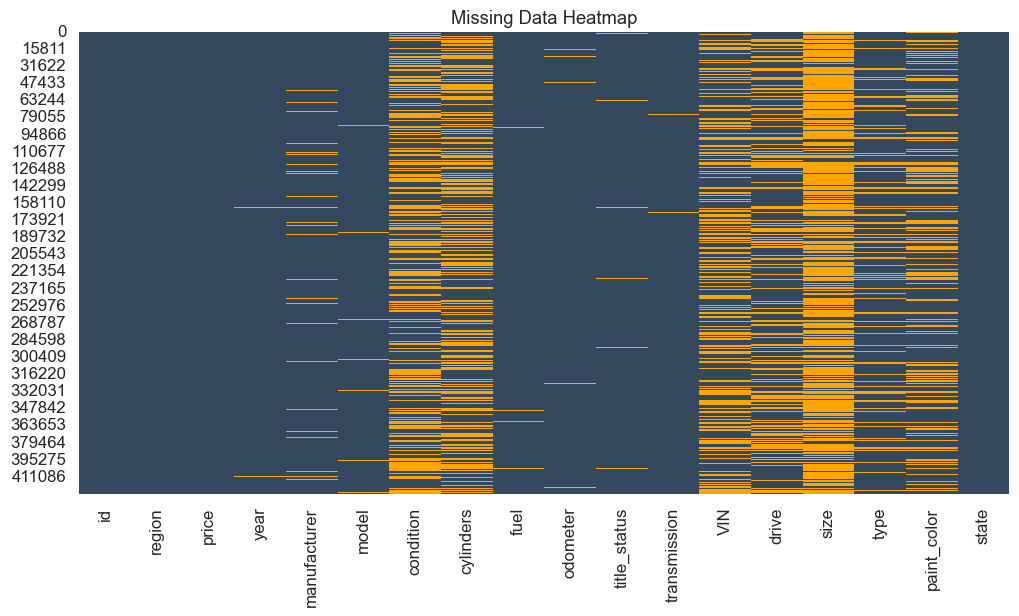

In [20]:
# Let us also check the percentage of missing values per column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.sort_values(ascending=False))

# Lets us visualize the missing data pattern using a heatmap
plt.figure(figsize=(12, 6))
colors = ['#34495E', 'orange'] # 0: False (present), 1: True (missing)
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(colors)) #instead of cmap='viridis', let us use a custom palette to make it more visually appealing
plt.title("Missing Data Heatmap")
plt.show()

In [21]:
# Continuing to identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [ ]:
# Showing top categories for key categorical variables
for col in categorical_cols[:]:  # previewing all columns. First 5 categorical_cols[:5]categorical columns
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())


Column: region
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
Name: count, dtype: int64

Column: manufacturer
manufacturer
ford         70985
chevrolet    55064
toyota       34202
honda        21269
nissan       19067
Name: count, dtype: int64

Column: model
model
f-150             8009
silverado 1500    5140
1500              4211
camry             3135
silverado         3023
Name: count, dtype: int64

Column: condition
condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
Name: count, dtype: int64

Column: cylinders
cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
Name: count, dtype: int64

Column: fuel
fuel
gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: count, dtype: int64

Column: titl

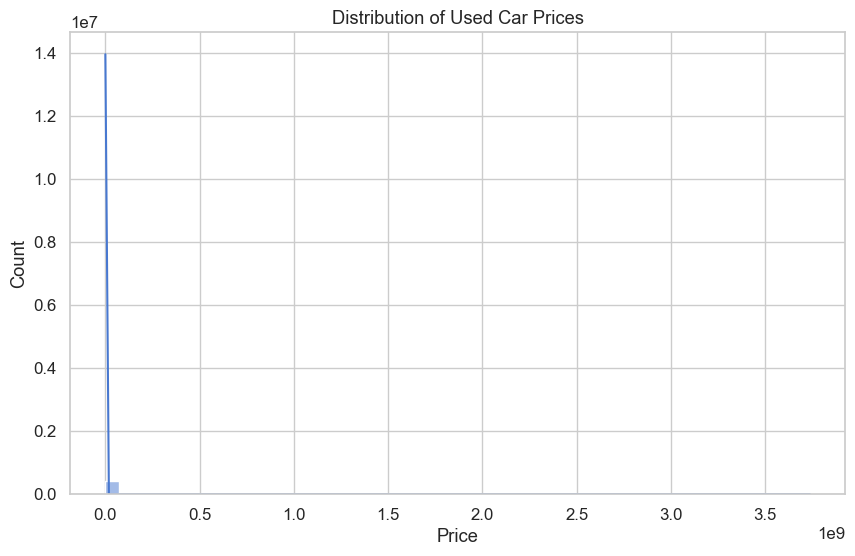

In [27]:
# Let us get the price distribution to understand the target variable better
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Used Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

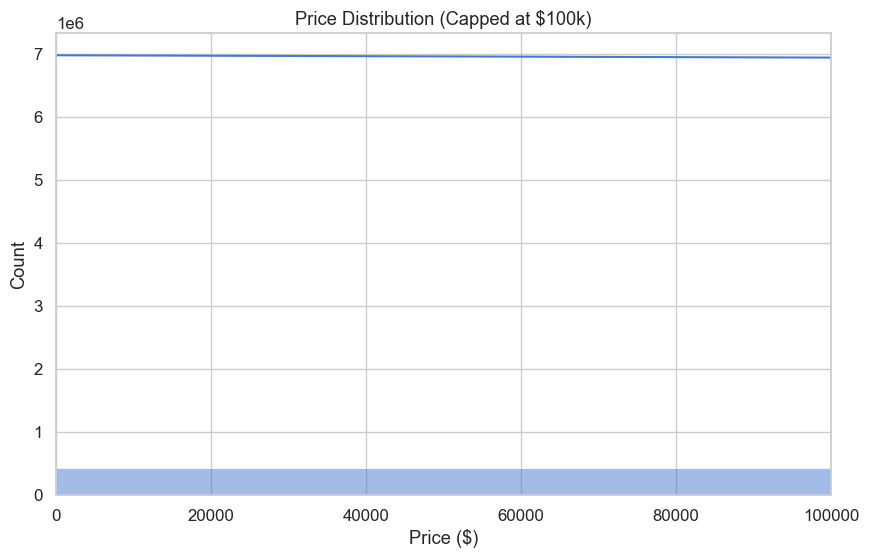

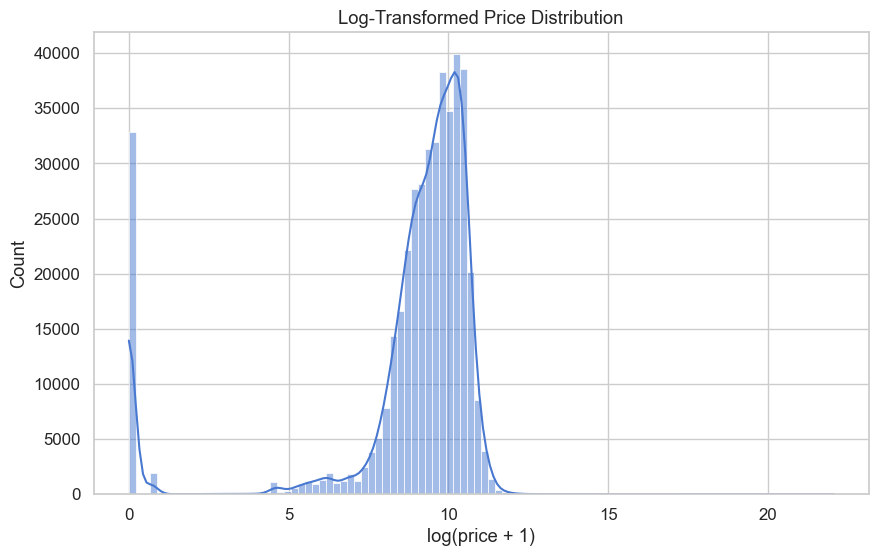

In [ ]:
# Plot histogram (with x-axis limits)
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 100000)
plt.title("Price Distribution (Capped at $100k)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

# Let us try a log transformed plot instead to see if it gives us a better view of the distribution, especially for the long tail
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df['price']), bins=100, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(price + 1)")
plt.ylabel("Count")
plt.show()

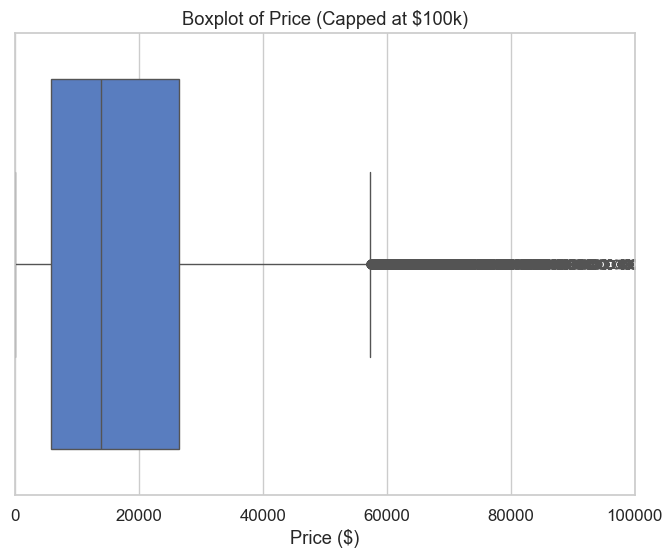

In [31]:
# Trying boxplot to visualize outliers in price
plt.figure(figsize=(8,6))
sns.boxplot(x=df['price'])
plt.xlim(0, 100000)
plt.title("Boxplot of Price (Capped at $100k)")
plt.xlabel("Price ($)")
plt.show()

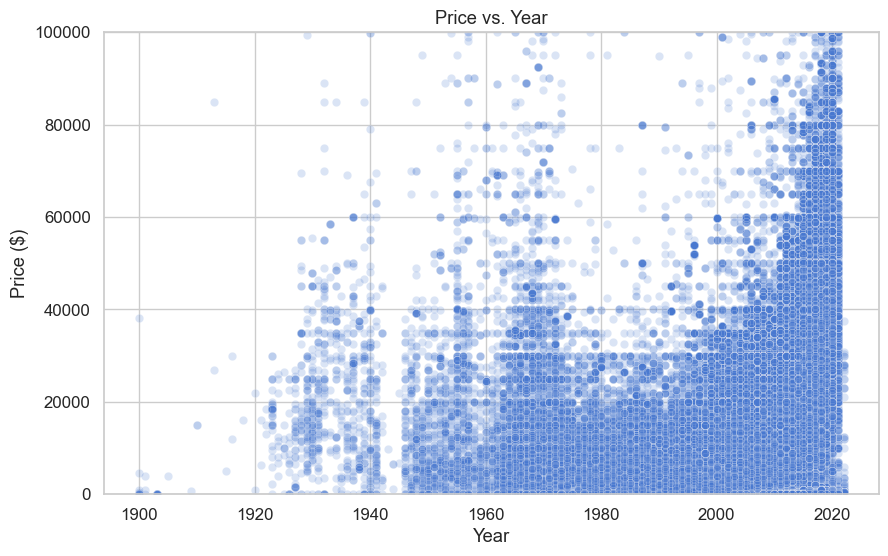

In [34]:
# Trying Price vs Year (to see how price varies with the age of the car)
# plt.figure(figsize=(12,6))
# sns.scatterplot(x='year', y='price', data=df)
# plt.title("Price vs Year")
# plt.xlabel("Year")
# plt.ylabel("Price ($)")
# plt.show() 

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='price', alpha=0.2)
plt.ylim(0, 100000)
plt.title("Price vs. Year")
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.show()

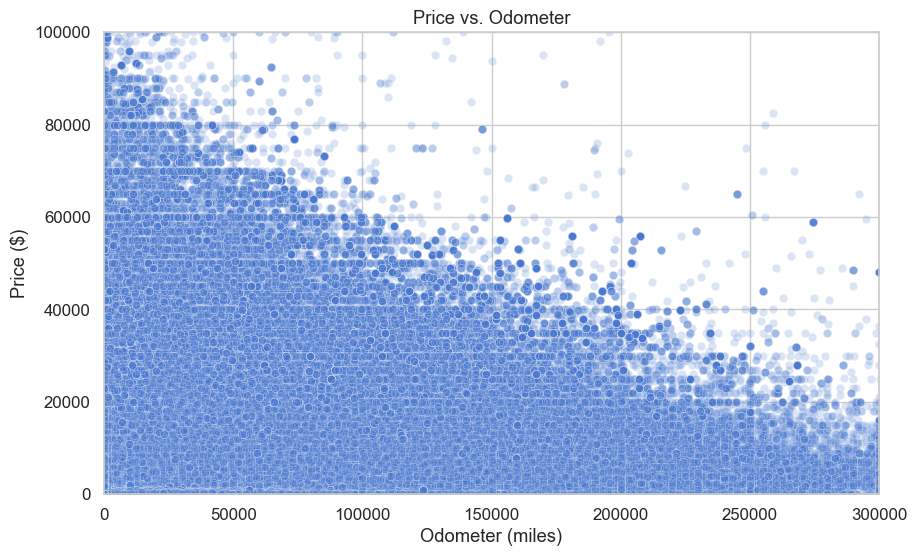

In [35]:
# Let us plot Price ve Odometer to see how price varies with mileage
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.2)
plt.ylim(0, 100000)
plt.xlim(0, 300000)
plt.title("Price vs. Odometer")
plt.xlabel("Odometer (miles)")
plt.ylabel("Price ($)")
plt.show()

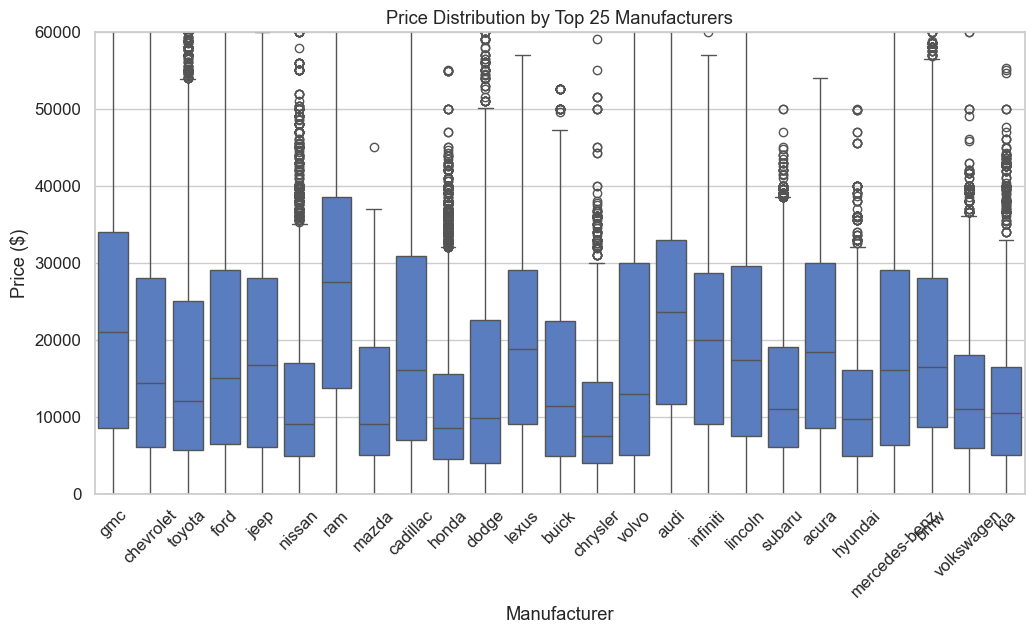

In [38]:
# Let us check Price vs Manufacturer to see how price varies across different car brands
top_brands = df['manufacturer'].value_counts().head(25).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['manufacturer'].isin(top_brands)], 
            x='manufacturer', y='price')
plt.ylim(0, 60000)
plt.xticks(rotation=45)
plt.title("Price Distribution by Top 25 Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Price ($)")
plt.show()

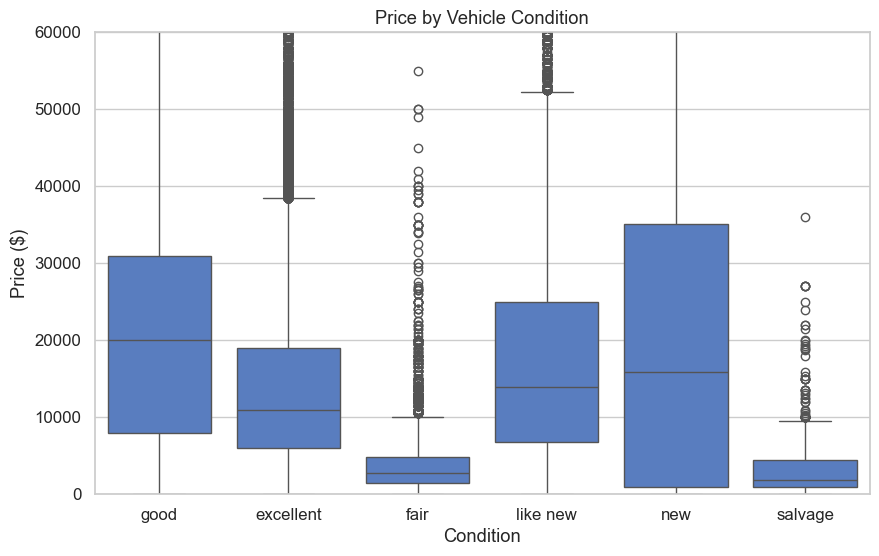

In [39]:
# Lets us also plot based upon car condition to see how price varies with condition
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='condition', y='price')
plt.ylim(0, 60000)
plt.title("Price by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Price ($)")
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### Data Preparation

Here our goal is to construct a clean, reliable dataset suitable for regression modeling. Based on our Data Understanding work above, the used car dataset contains several issues that must be addressed:

#### Key Data Quality Issues Identified
- **Missing values** in many important categorical fields (manufacturer, model, condition, cylinders, drive, size, type).
- **Extreme outliers** in price (values in the millions or billions), odometer (0 or 10 million), and year (1900).
- **Skewed distributions**, especially for price and odometer.
- **High-cardinality categorical variables** such as model and VIN.
- **Non‑informative columns** (e.g., VIN, id, region) that should be removed.

#### Data Preparation Objectives
1. **Filter unrealistic values**  
   - Remove cars with price = 0 or extremely high values.  
   - Remove unrealistic years (e.g., < 1985 or > current year).  
   - Remove odometer outliers (e.g., > 500,000 miles).

2. **Engineer useful features**  
   - Create `age` = current_year − year.  
   - Consider log-transforming price to reduce skew.

3. **Handle missing values**  
   - Drop rows missing essential fields (price, year, odometer).  
   - Impute or group categorical variables with missingness.

4. **Encode categorical variables**  
   - Use one-hot encoding for manufacturer, fuel, transmission, etc.  
   - Drop high-cardinality fields like VIN and model (optional).

5. **Prepare final modeling dataset**  
   - Split into features (X) and target (y).  
   - Scale or transform variables if needed.

This stage as per CRISP-DM will help us ensure that our regression models are trained on clean, meaningful data and that the resulting insights are trustworthy and interpretable.

In [40]:
# We need to drop columns that are not useful for modeling
df_clean = df.drop(columns=['id', 'VIN', 'region'])
df_clean.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [43]:
# Checking price distribution
print(f"max_price = {df['price'].max()}")
print(f"med_price = {df['price'].median()}")
print(f"min_price = {df['price'].min()}")

# Removing price = 0 or negative
df_clean = df_clean[df_clean['price'] > 0]

# Remove extreme outliers (e.g., > $100,000)
df_clean = df_clean[df_clean['price'] < 100000] # Setting our threshold at $100,000 as beyond that we are likely looking at outliers or data entry errors

df_clean['price'].describe()

max_price = 3736928711
med_price = 13950.0
min_price = 0


count    393288.000000
mean      18709.269533
std       14504.718754
min           1.000000
25%        7000.000000
50%       15000.000000
75%       27590.000000
max       99999.000000
Name: price, dtype: float64

In [ ]:
# Checking year distribution
print(f"max_year = {df['year'].max()}")
print(f"med_year = {df['year'].median()}")
print(f"min_year = {df['year'].min()}")

# Remove unrealistic years
df_clean = df_clean[(df_clean['year'] >= 1985) & (df_clean['year'] <= 2022)] # doesn't makes sense to have cars older than 1985 

# Creating age of car feature. This would be a new column that captures the age of the car, which should help us in determining its price. 
# We will calculate it as the difference between the max year (2022) and the year of manufacture.
df_clean['age'] = 2022 - df_clean['year']

df_clean['age'].describe()

max_year = 2022.0
med_year = 2013.0
min_year = 1900.0


count    382644.000000
mean          9.872550
std           6.166773
min           0.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          37.000000
Name: age, dtype: float64

In [50]:
# Checking odometer distribution
print(f"max_odometer = {df['odometer'].max()}")
print(f"med_odometer = {df['odometer'].median()}")
print(f"min_odometer = {df['odometer'].min()}")

# Removing 'odometer' outliers - values that are unrealistic (e.g., > 300,000 miles)
df_clean = df_clean[(df_clean['odometer'] > 0) & (df_clean['odometer'] < 500000)]

df_clean['odometer'].describe()

max_odometer = 10000000.0
med_odometer = 85548.0
min_odometer = 0.0


count    378574.000000
mean      93660.220226
std       63914.891516
min           1.000000
25%       39219.000000
50%       88354.000000
75%      136235.000000
max      499232.000000
Name: odometer, dtype: float64

In [54]:
# Drop rows missing essential numeric fields
df_clean = df_clean.dropna(subset=['year', 'odometer'])

# For categorical variables, let usfill missing with "unknown"
categorical_cols = df_clean.select_dtypes(include='object').columns
df_clean[categorical_cols] = df_clean[categorical_cols].fillna("unknown")

print(f"Missing values after cleanup: {df_clean.isnull().sum()}")
df_clean.head()

Missing values after cleanup: price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
age             0
dtype: int64


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,age
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,unknown,unknown,pickup,white,al,8.0
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,unknown,unknown,pickup,blue,al,12.0
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,unknown,unknown,pickup,red,al,2.0
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,unknown,unknown,pickup,red,al,5.0
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al,9.0


In [62]:
# Dropping high-cardinality columns that are not useful for modeling
df_clean = df_clean.drop(columns=['model', 'state', 'paint_color'])

# Frequency encode medium-cardinality columns
freq_cols = ['manufacturer', 'condition', 'cylinders', 'drive', 'type']
for col in freq_cols:
    freq = df_clean[col].value_counts()
    df_clean[col] = df_clean[col].map(freq)

#### We need to encode categorial variables
**Encoding categorical variables is necessary** because:

- Models require numeric inputs.
- We want to preserve the categorical nature of the data.
- We want interpretable, category‑specific effects.

#### Why encode categorical variables?

Most of our important predictors (manufacturer, fuel, transmission, condition, etc.) are stored as text. Scikit‑learn’s regression models require numeric inputs and cannot directly work with string labels. We use one‑hot encoding to convert each category into a separate binary column (0/1), which allows the model to estimate a separate effect for each category without imposing a fake numeric order (e.g., "toyota" ≠ 1, "honda" ≠ 2 in any meaningful sense). This makes the data usable for modeling and keeps the interpretation of category effects clear and intuitive.

In [76]:
# Our LinearRegression model failed below because we had some categorical variables that were not properly encoded, 
# which caused issues when trying to fit the model. We need to make sure all our features are numeric before we can proceed with modeling.
# ValueError: could not convert string to float: 'unknown'


# Frequency encode 'size'
freq = df_clean['size'].value_counts()
df_clean['size'] = df_clean['size'].map(freq)

In [77]:
# One-hot encode categorical variables
# df_encoded = pd.get_dummies(df_clean, drop_first=True) # We can't use one-hot encoding for all categorical variables due to high cardinality, 
# so we will skip this step for now and just use frequency encoding for the medium-cardinality columns. We have already dropped the high-cardinality columns above.

# One-hot encode low-cardinality columns
df_encoded = pd.get_dummies(
    df_clean,
    columns=['fuel', 'transmission', 'title_status'],
    drop_first=True
)

df_encoded.head()

,price,year,manufacturer,condition,cylinders,odometer,drive,size,type,age,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,fuel_unknown,transmission_manual,transmission_other,transmission_unknown,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,title_status_unknown
27,33590,2014.0,15031,115700,61284,57923.0,114706,272625,39905,8.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False
28,22590,2010.0,47490,115700,61284,71229.0,114706,272625,39905,12.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False
29,39590,2020.0,47490,115700,61284,19160.0,114706,272625,39905,2.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False
30,30990,2017.0,31188,115700,61284,41124.0,114706,272625,39905,5.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False
31,15000,2013.0,62155,90532,86487,128000.0,49577,55415,29630,9.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False


#### Log transform is useful for used car prices here. *Our visual plot showed skewed data for pricing above.*

Used car prices behave like an economic variables:

- Lots of lower‑priced items  
- Fewer high‑priced items  
- Big relative differences do matter more than big absolute differences at the top end

Log‑transforming price:

- Makes our model more robust to outliers  
- It should help us improve predictive performance  
- Also help us produce **business‑friendly interpretations** (“*this feature is associated with ~X% higher price*”)

#### Why log-transform price?

The raw price variable is highly skewed, with a long right tail and some extreme values. This can violate linear regression assumptions and make it harder for the model to capture relationships between predictors and price. By modeling `log(price + 1)` instead of price directly, we reduce skewness, stabilize variance, and make many relationships more linear. On the log scale, coefficients can also be interpreted approximately as percentage changes in price, which is more intuitive for business stakeholders (e.g., "this feature is associated with about a 7% higher price").

In [78]:
# Let's log transform price to reduce skewness and make it more suitable for modeling
df_encoded['log_price'] = np.log1p(df_encoded['price'])

In [79]:
# Out LinearRegression model failed below because we had some categorical variables that were not properly encoded, 
# which caused issues when trying to fit the model. We need to make sure all our features are numeric before we can proceed with modeling.
# ValueError: could not convert string to float: 'unknown'


# Let us identify any columns that still contain object (string) data
df_encoded.dtypes[df_encoded.dtypes == 'object'] # It looks like we have successfully converted all categorical variables to numeric, 
#so we should be good to go for modeling now.

# Just to be sure, let us also check if there are any columns that still contain "unknown" values, 
# which would indicate that we have some categorical variables that were not properly encoded.
[col for col in df_encoded.columns if df_encoded[col].dtype == 'object' and df_encoded[col].str.contains('unknown').any()]
# Column ['size'] was returned. This means that the 'size' column still contains some "unknown" values, 
# which indicates that it is a categorical variable that was not properly encoded. We will need to handle this before we can proceed with modeling.


[]

In [80]:
# Our dataset should be ready now for modeling. We have cleaned the data, handled missing values, removed outliers, and created a log-transformed target variable. Next steps would involve splitting the data into training and testing sets, selecting features, and building regression models to predict car prices.
# Defining our target and features
y = df_encoded['log_price']  # or 'price'
X = df_encoded.drop(columns=['price', 'log_price'])

X.shape, y.shape

((378574, 23), (378574,))

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Modeling

Moving into the Modeling phase of CRISP‑DM. Here our goal is to build regression models that can predict used car prices (*or log-transformed prices*) and help us understand which features most strongly influence price.

#### Modeling Objectives
1. Establish a **baseline model** using Linear Regression.
2. Improve performance and reduce overfitting using **regularized models**:
   - Ridge Regression (L2 regularization)
   - Lasso Regression (L1 regularization)
3. Use **cross-validation** to obtain more reliable performance estimates.
4. Use **GridSearchCV** to tune hyperparameters (e.g., alpha).
5. Evaluate models using:
   - **RMSE** (Root Mean Squared Error) — interpretable in dollars
   - **MAE** (Mean Absolute Error)
   - **R²** (variance explained)
6. Interpret coefficients to understand which features increase or decrease price.

We will model **log(price)** because it reduces skewness, stabilizes variance, and makes coefficients interpretable as approximate percentage changes.

*After reducing dimensionality and preparing a clean modeling dataset, we need to build regression models to understand which factors drive used car prices. Because our target variable is log-transformed (`log_price`), model coefficients can be interpreted as approximate percentage changes in price.*

In [81]:
from sklearn.model_selection import train_test_split

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((302859, 23), (75715, 23))

In [82]:
# Starting with Linear Regression as a baseline model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Fit our baseline model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Preparing predictions
y_pred_lr = lin_reg.predict(X_test)

# Evaluation steps
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, mae_lr, r2_lr

(np.float64(1.0398407352918748), 0.5624740532817678, 0.272582003723713)

In [83]:
# It would be easier to build a reusable function to plot predictions vs actuals for our regression models, 
# so we can visualize how well our model is performing.

def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.3)
    
    # 45-degree reference line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 
             color='red', linestyle='--', linewidth=2)
    
    plt.xlabel("Actual Log-Price")
    plt.ylabel("Predicted Log-Price")
    plt.title(title)
    plt.show()

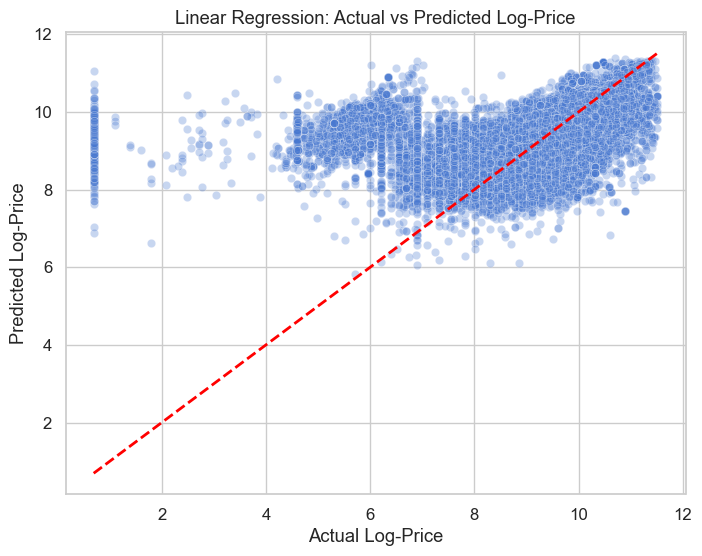

In [84]:
# Plotting Linear Regression model from above
plot_predictions(y_test, y_pred_lr, "Linear Regression: Actual vs Predicted Log-Price")

In [85]:
# Running Cross-Validation to get a better sense of model performance
from sklearn.model_selection import cross_val_score

cv_rmse_lr = np.sqrt(-cross_val_score(
    lin_reg, X, y, scoring='neg_mean_squared_error', cv=5
))

cv_rmse_lr.mean(), cv_rmse_lr.std()

(np.float64(1.0223120999141986), np.float64(0.1675108622823037))

In [86]:
# Lets run the Ridge Regression model to see if it can help us reduce overfitting and improve performance compared to Linear Regression. 
# Ridge regression adds L2 regularization which can help prevent overfitting by penalizing large coefficients.

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.1, 1, 10, 50, 100, 200]}

ridge = Ridge()

ridge_grid = GridSearchCV(
    ridge,
    ridge_params,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)

ridge_best = ridge_grid.best_estimator_
ridge_best

,"alpha alpha: {float, ndarray of shape (n_targets,)}, default=1.0Constant that multiplies the L2 term, controlling regularizationstrength. `alpha` must be a non-negative float i.e. in `[0, inf)`.When `alpha = 0`, the objective is equivalent to ordinary leastsquares, solved by the :class:`LinearRegression` object. For numericalreasons, using `alpha = 0` with the `Ridge` object is not advised.Instead, you should use the :class:`LinearRegression` object.If an array is passed, penalties are assumed to be specific to thetargets. Hence they must correspond in number.",1
,"fit_intercept fit_intercept: bool, default=TrueWhether to fit the intercept for this model. If setto false, no intercept will be used in calculations(i.e. ``X`` and ``y`` are expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"max_iter max_iter: int, default=NoneMaximum number of iterations for conjugate gradient solver.For 'sparse_cg' and 'lsqr' solvers, the default value is determinedby scipy.sparse.linalg. For 'sag' solver, the default value is 1000.For 'lbfgs' solver, the default value is 15000.",None
,"tol tol: float, default=1e-4The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for each solver:- 'svd': `tol` has no impact.- 'cholesky': `tol` has no impact.- 'sparse_cg': norm of residuals smaller than `tol`.- 'lsqr': `tol` is set as atol and btol of scipy.sparse.linalg.lsqr, which control the norm of the residual vector in terms of the norms of matrix and coefficients.- 'sag' and 'saga': relative change of coef smaller than `tol`.- 'lbfgs': maximum of the absolute (projected) gradient=max|residuals| smaller than `tol`... versionchanged:: 1.2 Default value changed from 1e-3 to 1e-4 for consistency with other linear models.",0.0001
,"solver solver: {'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'}, default='auto'Solver to use in the computational routines:- 'auto' chooses the solver automatically based on the type of data.- 'svd' uses a Singular Value Decomposition of X to compute the Ridge coefficients. It is the most stable solver, in particular more stable for singular matrices than 'cholesky' at the cost of being slower.- 'cholesky' uses the standard :func:`scipy.linalg.solve` function to obtain a closed-form solution.- 'sparse_cg' uses the conjugate gradient solver as found in :func:`scipy.sparse.linalg.cg`. As an iterative algorithm, this solver is more appropriate than 'cholesky' for large-scale data (possibility to set `tol` and `max_iter`).- 'lsqr' uses the dedicated regularized least-squares routine :func:`scipy.sparse.linalg.lsqr`. It is the fastest and uses an iterative procedure.- 'sag' uses a Stochastic Average Gradient descent, and 'saga' uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that 'sag' and 'saga' fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from :mod:`sklearn.preprocessing`.- 'lbfgs' uses L-BFGS-B algorithm implemented in :func:`scipy.optimize.minimize`. It can be used only when `positive` is True.All solvers except 'svd' support both dense and sparse data. However, only'lsqr', 'sag', 'sparse_cg', and 'lbfgs' support sparse input when`fit_intercept` is True... versionadded:: 0.17 Stochastic Average Gradient descent solver... versionadded:: 0.19 SAGA solver.",'auto'
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.Only 'lbfgs' solver is supported in this case.",False
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag' or 'saga' to shuffle the data.See :term:`Glossary ` for details... versionadded:: 0.17 `random_state` to support Stochastic Average Gradient.",None


In [87]:
# Let us evaluate the Ridge Regression model on the test set
y_pred_ridge = ridge_best.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

rmse_ridge, mae_ridge, r2_ridge

(np.float64(1.0398429463304237), 0.5624762593978551, 0.2725789102674052)

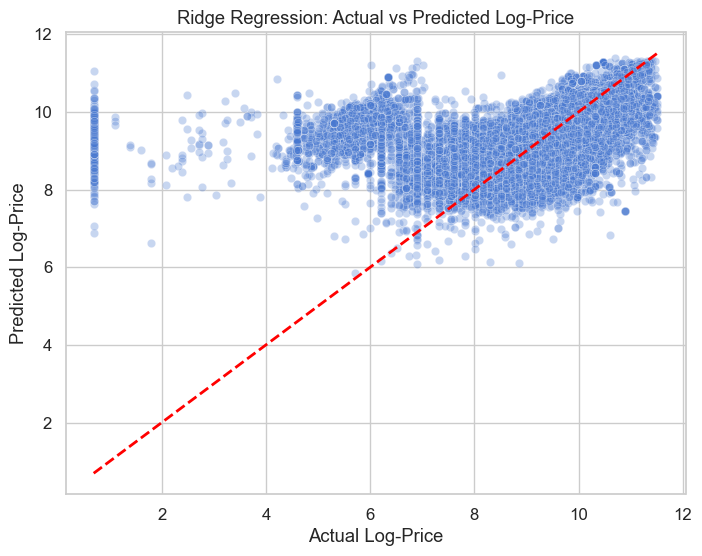

In [88]:
# The price distribution is highly right-skewed, with a long tail towards higher prices. 
# This suggests that while most cars are priced at the lower end, there are some expensive outliers. 
# We may need to consider transformations or outlier handling in later stages of modeling.

# Plotting Ridge Regression model from above
plot_predictions(y_test, y_pred_ridge, "Ridge Regression: Actual vs Predicted Log-Price")

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.